# Практика 9
Корешков

```
9)
Обчислити інтеграл від функції f(x) на відрізку [a;b]  при n=10 методом Х і оцінити отриману похибку
1) Корешков Михайло   f(x)=(x+2)/(x^2+1); 
[a;b]=[0,7;1,5] методом трапецій

```

# Теорія
В якості наближення інтегралів береться квадратурна формула вигляду
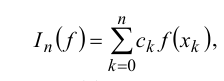

## Метод трапецій
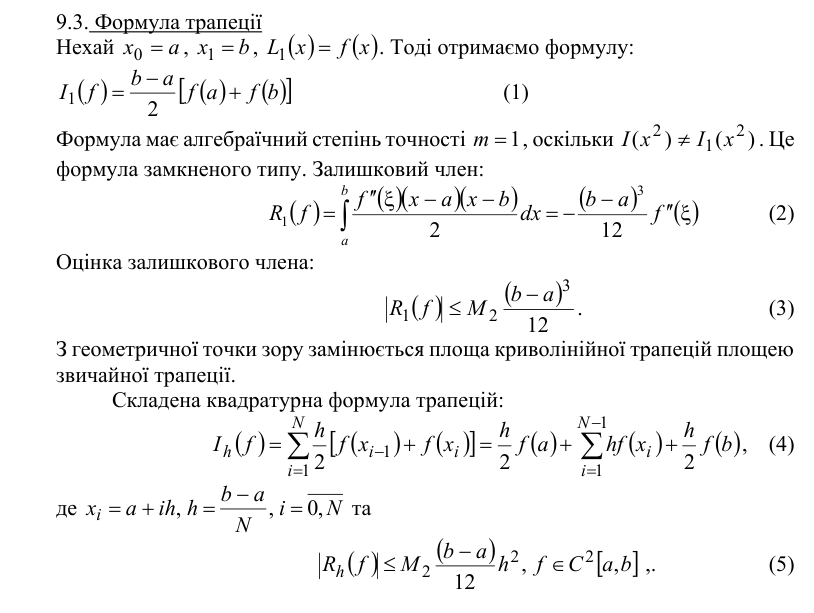
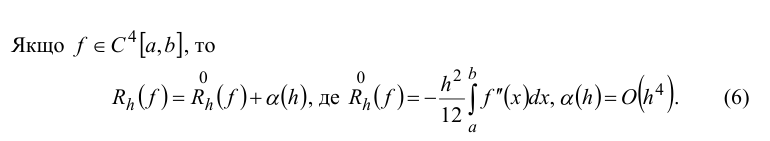

In [1]:
xlims = 0.7, 1.5
n = 10